In [1]:
import os
import numpy as np
import pandas as pd
dataframe = pd.read_csv('/home/yupaporn/codes/USAI/FVtrain_fold6_1.csv') #เปลี่ยนไฟล์
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,0.265412,-0.085896,-0.209470,-0.145436,-0.175127,-0.176019,0.510829,0.392638,-0.187537,-0.168381,...,0.312787,-0.116068,0.349102,-0.055969,0.279158,-0.091294,Abnormal,P31,FP-B,AB01
1,0.123613,-0.122531,-0.190719,-0.190969,-0.184880,-0.127303,0.753878,0.546069,-0.144427,-0.173074,...,-0.019998,-0.189732,0.418157,-0.033811,0.131148,-0.116227,Abnormal,P1,FP-A,AB01
2,0.386434,-0.131048,-0.215027,-0.198011,-0.164125,-0.162103,0.572358,0.368222,-0.164809,-0.187597,...,-0.030152,-0.201273,0.625276,-0.078993,0.073896,0.001003,Abnormal,P2,FP-A,AB01
3,0.067816,-0.175170,-0.169437,-0.168846,-0.067768,-0.104297,0.584728,0.254773,-0.202553,-0.153879,...,0.357242,-0.174721,0.220965,-0.096409,0.013288,-0.086635,Abnormal,P42,FP-B,AB01
4,-0.016152,0.004337,-0.167374,-0.205826,-0.173079,-0.157853,0.302205,0.137995,-0.188578,-0.079937,...,0.282282,-0.210486,0.132493,-0.056317,0.136689,-0.102356,Abnormal,P41,FP-B,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,0.270807,0.331862,-0.145555,-0.176715,0.016387,0.303407,-0.013214,0.026633,0.089005,-0.105857,...,0.369420,-0.196180,0.432122,-0.120970,0.276121,0.571868,Normal,P32,FP-B,Normal
4595,0.732555,0.552080,-0.029074,-0.160140,0.096262,0.445008,-0.090629,0.377354,-0.048154,0.307368,...,0.438618,-0.129070,0.291980,0.007320,0.348226,0.504122,Normal,P42,FP-B,Normal
4596,0.265498,0.348598,-0.056474,0.258481,0.337387,0.858647,-0.145486,0.061481,-0.025090,-0.015092,...,0.413502,-0.078629,0.806605,0.282031,0.001482,0.768551,Normal,P52,FP-C,Normal
4597,-0.063376,0.151671,-0.148163,-0.182211,0.353531,0.041101,0.001847,0.437035,-0.107200,0.107438,...,0.269363,-0.092738,0.408000,0.293288,-0.072287,0.751579,Normal,P61,FP-C,Normal


In [2]:
X = dataframe.iloc[:,0:2048]
y = dataframe.iloc[:,2051]
print(X.shape)
print(y.shape)

(4599, 2048)
(4599,)


In [3]:
y[0]

'AB01'

# Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

# setting parameters

In [5]:
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 5, n_estimators = 400, min_samples_split =2) #เปลี่ยนตาม cell 8
             
modelOpt = forestOpt.fit(X, y)# 

In [6]:
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVval_fold6_1.csv') #เปลี่ยนชื่อไฟล์ Validation

In [7]:
dataframe

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,0,-0.097717,0.136312,-0.163146,-0.186132,-0.007192,-0.141101,0.175110,0.218748,-0.118956,...,0.590133,-0.158943,0.024588,-0.115820,-0.063057,0.116632,Abnormal,P42,FP-B,AB01
1,1,-0.012272,0.174711,0.024790,-0.071392,-0.172885,-0.105575,0.212080,-0.195478,-0.148986,...,-0.156060,-0.138653,0.261110,0.020226,0.143001,-0.059089,Abnormal,P2,FP-A,AB01
2,2,0.233236,0.055037,-0.215795,-0.218144,-0.131970,0.232693,0.022315,0.094391,-0.108470,...,-0.072385,-0.201401,-0.073348,-0.008590,-0.145945,-0.003767,Abnormal,P51,FP-C,AB01
3,3,-0.027375,0.166112,-0.086562,-0.076310,0.146691,-0.166689,-0.112204,0.298366,-0.141009,...,0.474753,-0.065622,0.161453,0.197567,0.169180,0.096334,Abnormal,P1,FP-A,AB01
4,4,-0.107802,-0.022921,-0.068973,0.094076,-0.076238,-0.165293,0.183674,0.144035,0.347906,...,-0.031338,-0.210777,0.311404,0.295855,-0.071694,-0.005229,Abnormal,P41,FP-B,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,653,0.371527,0.029048,0.085287,-0.058107,0.219668,-0.115382,-0.107344,0.050222,-0.043932,...,-0.121589,-0.170032,0.235072,0.029222,0.113906,0.183801,Normal,P32,FP-B,Normal
654,654,0.222695,0.250200,-0.004034,0.021151,0.094213,0.023570,0.004111,0.143960,-0.148635,...,0.034773,0.204958,-0.068307,-0.105471,0.001684,0.142425,Normal,P42,FP-B,Normal
655,655,0.207780,0.294627,-0.177244,-0.184302,0.079137,0.039889,0.121278,-0.106971,0.369487,...,0.530855,-0.194131,0.405464,-0.051596,0.207054,0.247247,Normal,P52,FP-C,Normal
656,656,0.163709,0.363359,-0.173050,-0.199170,-0.030296,0.072568,-0.008673,-0.182849,-0.054686,...,0.054596,-0.151560,-0.049079,0.355935,-0.104388,0.125740,Normal,P61,FP-C,Normal


In [8]:
X_test = dataframe.iloc[:,1:2049]
y_test = dataframe.iloc[:,2052]
print(X_test.shape)
print(y_test.shape)

(658, 2048)
(658,)


In [9]:
y_test

0        AB01
1        AB01
2        AB01
3        AB01
4        AB01
        ...  
653    Normal
654    Normal
655    Normal
656    Normal
657    Normal
Name: Sub_class, Length: 658, dtype: object

In [10]:
y_pred = modelOpt.predict(X_test)

In [11]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[ 25   5   0   2   0   0   0   0   0   0   0   0   0   0  12]
 [ 11  21   1   0   0   0   0   0   0   0   0   0   0   0   1]
 [  0   9   4   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  13   0   0   0   0   0   0   0   0   0   0   5]
 [  0   0   0   0   6   0   0   0   0   0   0   0   0   0   5]
 [  0   0   0   0   0   4   2   0   0   0   0   0   0   0   2]
 [  0   0   0   0   0   1   4   0   0   0   0   0   0   0   3]
 [  1   0   0   0   0   0   0   8   1   0   0   0   0   1   3]
 [  1   0   0   0   0   0   0   1   8   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   1   3   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  10   0   0   0   3]
 [  0   0   0   0   0   0   0   1   0   0   0   2   0   1   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   5   3   4]
 [  0   0   0   0   0   0   0   0   0   0   0   0   2  31   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   1 427]]
              precision    recall  f1-score   support


Text(0.5, 21.5, 'Predicted label')

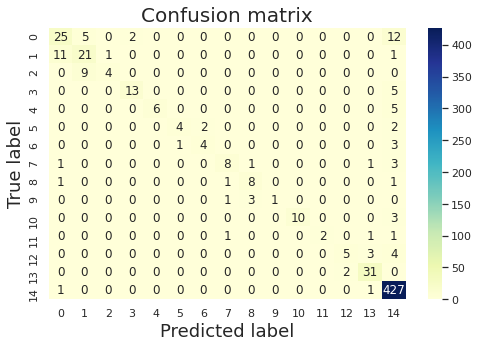

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

# Save Model

In [13]:
#Save Model

import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_6/models/')
filename = "modelrf_fold6_15AB_15AB_1.pkl" #เปลี่ยนชื่อไฟล์ Train random forest
with open(filename, 'wb') as file:
    pickle.dump(modelOpt, file)

In [ ]:
# #load model

# with open(filename, 'rb') as file:
#     model = pickle.load(file)